---

## 🧮 `pandas` — Data Analysis and Manipulation


**Import Syntax**:
```python
import pandas as pd
```

**Description**:  
`pandas` is a powerful, flexible library for data manipulation and analysis. It provides two primary data structures — `Series` (1D) and `DataFrame` (2D) — to handle labeled and relational data efficiently. It is extensively used for data wrangling, cleaning, merging, and time-series analysis.

---

## 🔢 `numpy` — Numerical Computing

**Import Syntax**:
```python
import numpy as np
```

**Description**:  
`numpy` is the fundamental package for scientific computing with Python. It supports large, multi-dimensional arrays and matrices, along with a vast library of mathematical functions to operate on these arrays efficiently. It is the foundation for many other scientific libraries.

---

## 📊 `matplotlib.pyplot` — Visualization

**Import Syntax**:
```python
import matplotlib.pyplot as plt
```

**Description**:  
`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. It provides a MATLAB-like plotting framework for creating static, animated, and interactive plots in Python. Common uses include visualizing trends, distributions, and relationships in data.

---

## 🎨 `seaborn` — Statistical Data Visualization

**Import Syntax**:
```python
import seaborn as sns
```

**Description**:  
`seaborn` is a high-level interface for drawing attractive and informative statistical graphics. Built on top of matplotlib, it simplifies complex visualizations like categorical plots, heatmaps, and regression plots with a more concise and readable syntax.

---

## 🧪 `train_test_split` — Dataset Splitting

**Import Syntax**:
```python
from sklearn.model_selection import train_test_split
```

**Description**:  
This utility function splits arrays or matrices into random train and test subsets. It is essential for evaluating the performance of machine learning models by ensuring they are tested on unseen data, helping prevent overfitting.

---

## ⚖️ `StandardScaler` — Feature Scaling

**Import Syntax**:
```python
from sklearn.preprocessing import StandardScaler
```

**Description**:  
`StandardScaler` standardizes features by removing the mean and scaling to unit variance. This preprocessing step is crucial for many ML algorithms that are sensitive to the scale of input data, such as SVMs and KNNs.

---

## 🧠 `SVC` — Support Vector Classification

**Import Syntax**:
```python
from sklearn.svm import SVC
```

**Description**:  
`SVC` (Support Vector Classifier) is a supervised learning model from the Support Vector Machine (SVM) family. It is used for binary and multi-class classification by constructing hyperplanes that maximize the margin between classes. Supports linear and non-linear kernels.

---

## 💾 `pickle` — Object Serialization

**Import Syntax**:
```python
import pickle
```

**Description**:  
`pickle` is a built-in Python module used for serializing and deserializing Python objects. It allows complex data types like models, lists, and dictionaries to be saved to disk and reloaded later, making it ideal for storing trained machine learning models and configurations.

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Data  Explorartion

In [5]:

class DataPreprocessor:
    def __init__(self, df):
        self.df = df.copy()

    
    def info(self):
        print("\n Dataset Info:")
        print(self.df.info())

    def shape(self):
        print(f"\n Shape of Dataset: {self.df.shape}")
        return self.df.shape

    def head(self, n=5):
        print(f"\n First {n} Rows:")
        return self.df.head(n)

   
    def is_null(self):
        print("\n🔍 Null Values Count:")
        return self.df.isnull().sum()

    def drop_duplicate(self):
        before = self.df.shape[0]
        self.df.drop_duplicates(inplace=True)
        after = self.df.shape[0]
        print(f"\n Dropped {before - after} duplicate rows.")

    
    def clean_data(self):
        print("\n Cleaning data...")
        num_cols = self.df.select_dtypes(include=np.number).columns
        self.df[num_cols] = self.df[num_cols].fillna(self.df[num_cols].median())

        obj_cols = self.df.select_dtypes(include='object').columns
        for col in obj_cols:
            self.df[col] = self.df[col].fillna(self.df[col].mode()[0])

        return self.df

    def rename_columns(self):
        print("\n Renaming Columns (Removing Spaces & Making Lowercase)...")
        self.df.columns = self.df.columns.str.strip().str.lower().str.replace(' ', '_')
        print(" Columns Renamed Successfully.")

    def unique(self, col):
        if col in self.df.columns:
            print(f"\n Unique values in '{col}':")
            return self.df[col].unique()
        else:
            print(f" Column '{col}' not found.")
            return None

    def data_summary(self):
        print("\n Data Summary:")
        return self.df.describe(include='all')

   
    def encode_categorical(self):
        print("\n Encoding categorical columns...")
        cat_cols = self.df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            self.df[col] = self.df[col].astype('category').cat.codes
        print(f" Encoded {len(cat_cols)} categorical columns.")
        return self.df

   
    def correlation_with_target(self, target):
        if target not in self.df.columns:
            print(f" Target column '{target}' not found in DataFrame.")
            return None

        df_encoded = self.df.copy()
        for col in df_encoded.select_dtypes(include='object').columns:
            df_encoded[col] = df_encoded[col].astype('category').cat.codes

        correlations = df_encoded.corr()[target].sort_values(ascending=False)
        return correlations

    def plot_nulls(self):
        plt.figure(figsize=(10, 4))
        sns.heatmap(self.df.isnull(), cbar=False, cmap="viridis")
        plt.title("Missing Values Heatmap")
        plt.show()

    def plot_correlation(self):
       
        df_encoded = self.df.copy()
        for col in df_encoded.select_dtypes(include='object').columns:
            df_encoded[col] = df_encoded[col].astype('category').cat.codes

        plt.figure(figsize=(10, 6))
        sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
        plt.title("Correlation Heatmap (Encoded Data)")
        plt.show()

    def plot_distribution(self):
        num_cols = self.df.select_dtypes(include=np.number).columns
        if len(num_cols) == 0:
            print(" No numerical columns to plot.")
            return
        self.df[num_cols].hist(figsize=(12, 10), bins=20, color='skyblue')
        plt.suptitle("Numerical Features Distribution", fontsize=14)
        plt.show()

    def plot_categorical(self):
        cat_cols = self.df.select_dtypes(include='object').columns
        if len(cat_cols) == 0:
            print(" No categorical columns to plot.")
            return
        for col in cat_cols:
            plt.figure(figsize=(6, 4))
            sns.countplot(x=self.df[col], palette='Set2')
            plt.title(f"Count Plot for {col}")
            plt.xticks(rotation=45)
            plt.show()


    def full_eda(self, target=None):
        print("\nStarting Full EDA...\n")

        self.shape()
        self.info()
        print("\n--- Head of Data ---")
        print(self.head())

        print("\n--- Missing Values ---")
        print(self.is_null())
        self.plot_nulls()

        self.drop_duplicate()

        print("\n--- Data Summary ---")
        print(self.data_summary())

        print("\n--- Unique Values ---")
        for col in self.df.columns:
            unique_count = self.df[col].nunique()
            print(f"{col}: {unique_count} unique values")

        self.plot_distribution()
        self.plot_categorical()
        self.plot_correlation()

        if target:
            print(f"\n Correlation with Target: {target}")
            print(self.correlation_with_target(target))

        





 Cleaning data...

 Renaming Columns (Removing Spaces & Making Lowercase)...
 Columns Renamed Successfully.

Starting Full EDA...


 Shape of Dataset: (4024, 16)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     4024 non-null   int64 
 1   race                    4024 non-null   object
 2   marital_status          4024 non-null   object
 3   t_stage                 4024 non-null   object
 4   n_stage                 4024 non-null   object
 5   6th_stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   grade                   4024 non-null   object
 8   a_stage                 4024 non-null   object
 9   tumor_size              4024 non-null   int64 
 10  estrogen_status         4024 non-null   object
 11  progesterone_status     4024 non-

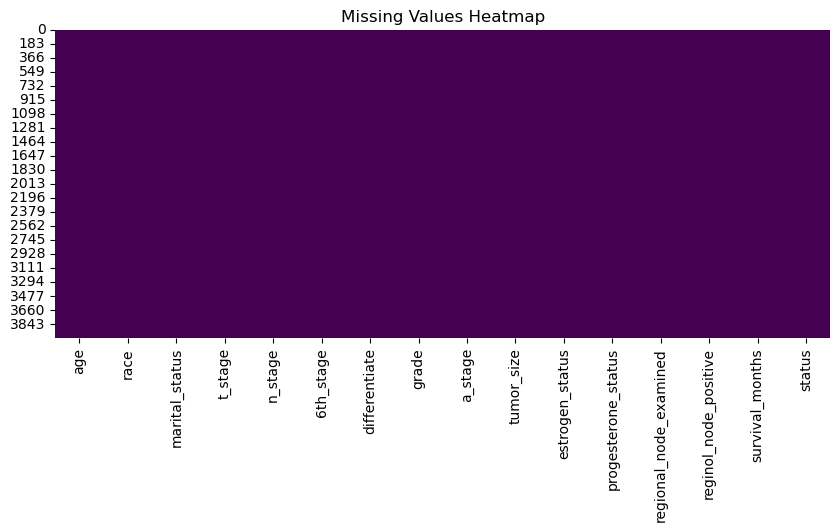


 Dropped 1 duplicate rows.

--- Data Summary ---

 Data Summary:
                age   race marital_status t_stage n_stage 6th_stage  \
count   4023.000000   4023           4023    4023    4023      4023   
unique          NaN      3              5       4       3         5   
top             NaN  White        Married      T2      N1       IIA   
freq            NaN   3412           2642    1786    2731      1304   
mean      53.969923    NaN            NaN     NaN     NaN       NaN   
std        8.963118    NaN            NaN     NaN     NaN       NaN   
min       30.000000    NaN            NaN     NaN     NaN       NaN   
25%       47.000000    NaN            NaN     NaN     NaN       NaN   
50%       54.000000    NaN            NaN     NaN     NaN       NaN   
75%       61.000000    NaN            NaN     NaN     NaN       NaN   
max       69.000000    NaN            NaN     NaN     NaN       NaN   

                    differentiate grade   a_stage   tumor_size  \
count          

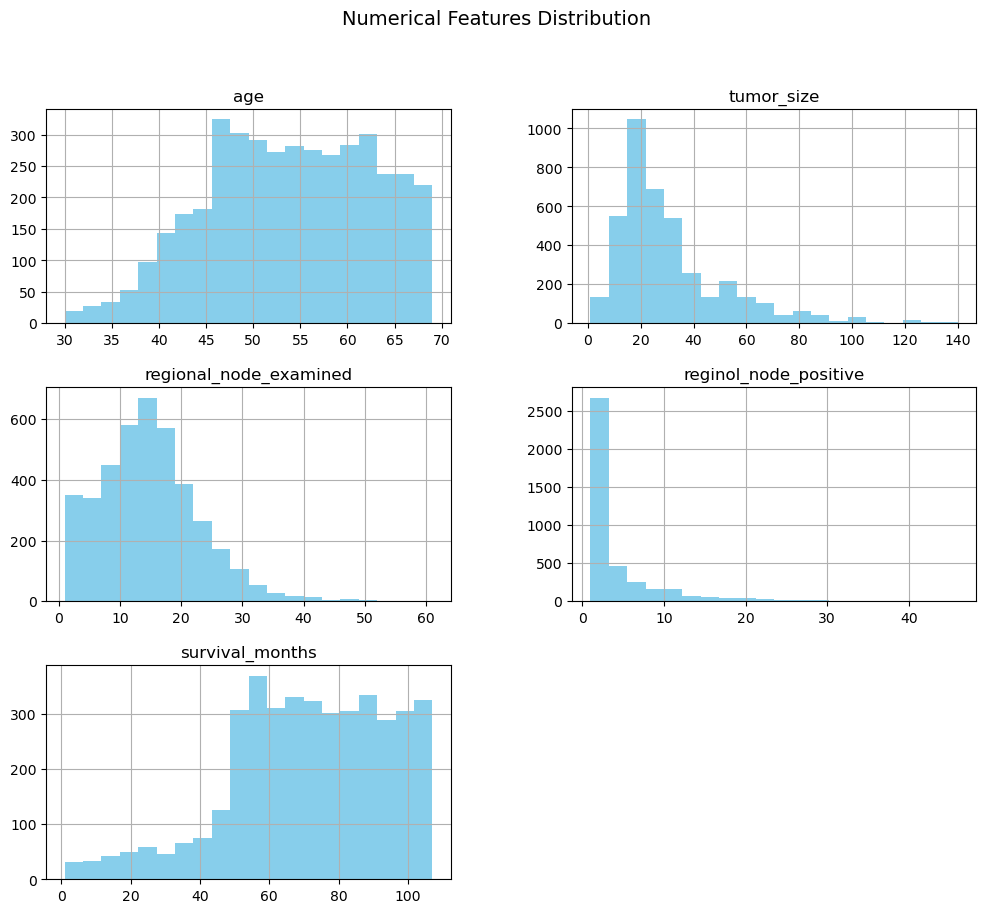

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


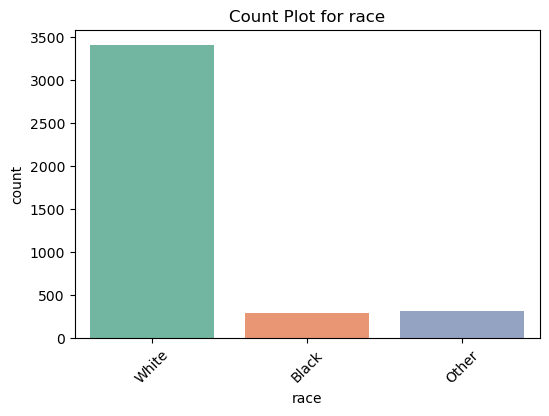

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


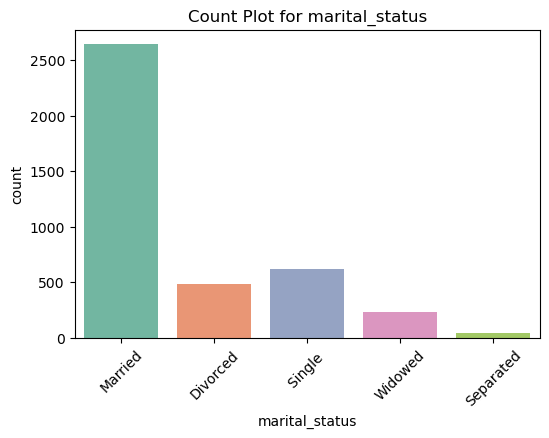

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


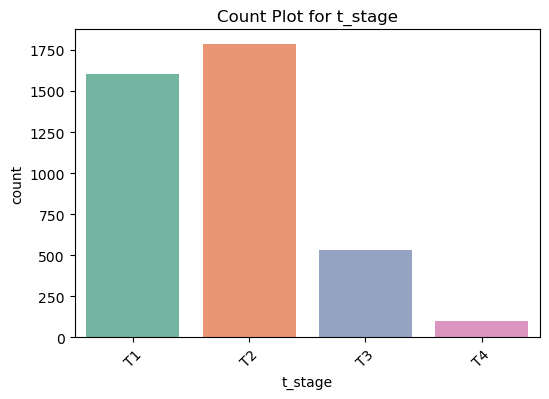

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


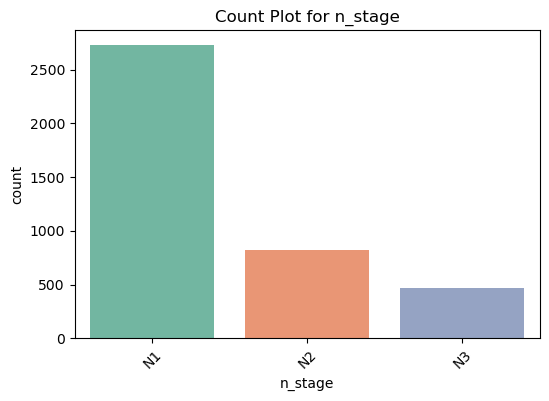

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


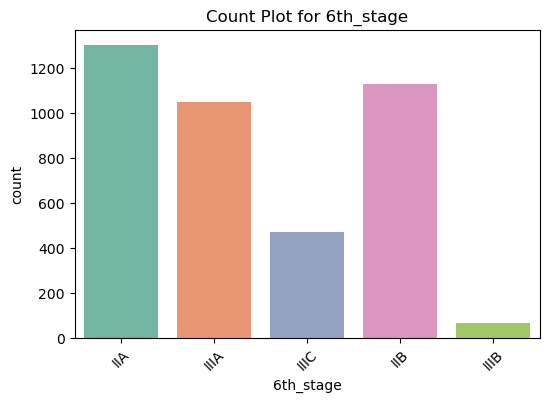

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


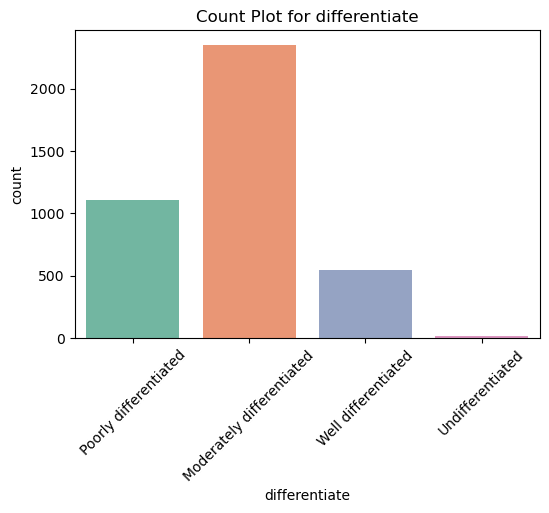

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


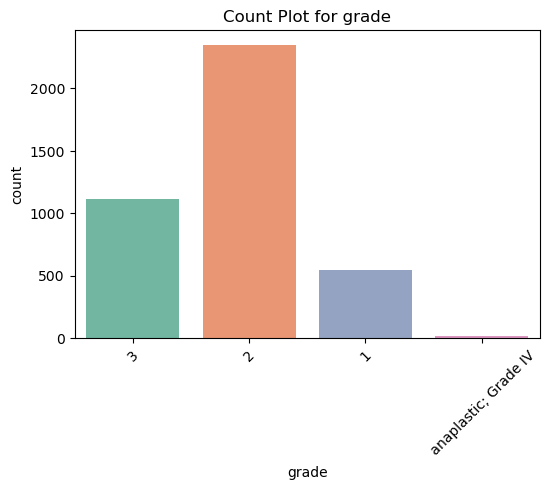

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


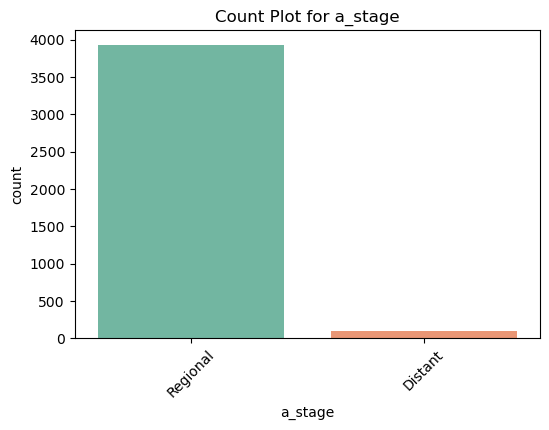

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


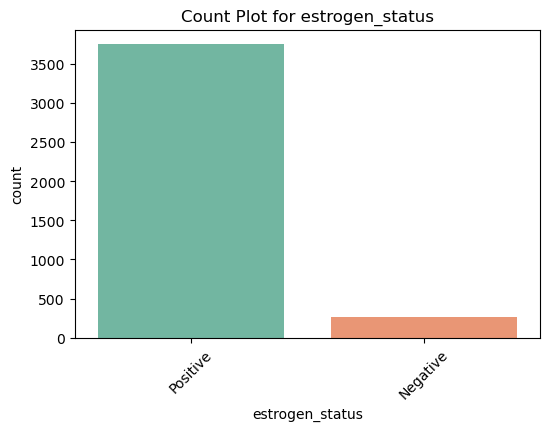

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


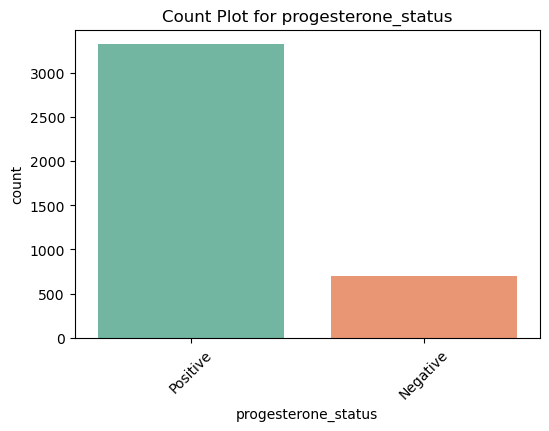

C:\Users\HassanComputer\AppData\Local\Temp\ipykernel_16488\3827591120.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[col], palette='Set2')


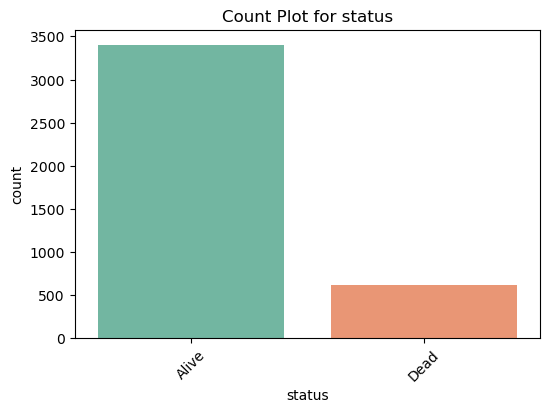

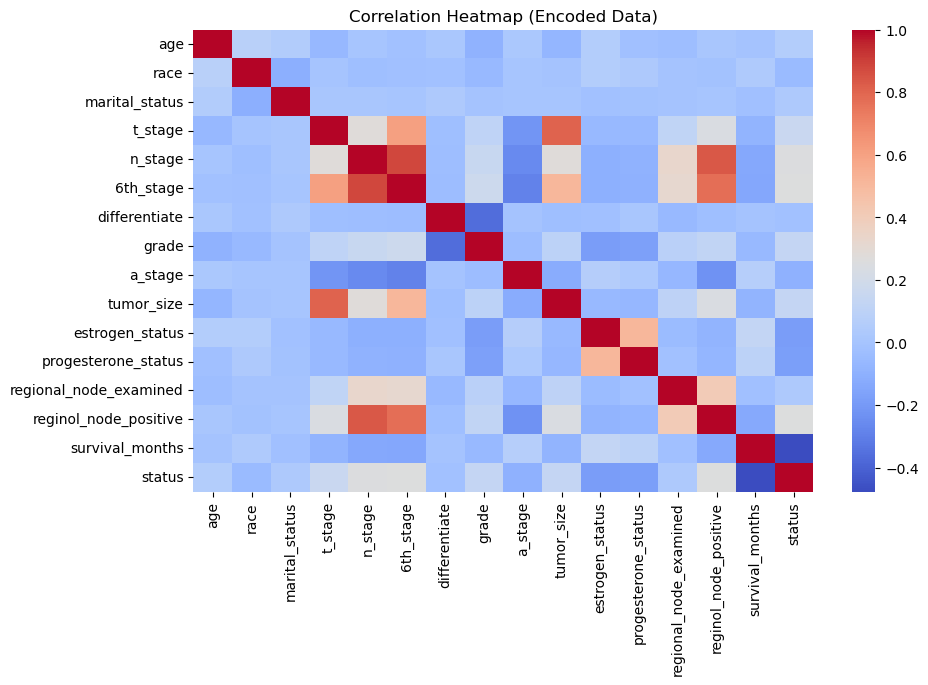


 Correlation with Target: Diagnosis
 Target column 'Diagnosis' not found in DataFrame.
None


In [6]:

df = pd.read_csv("Breast_Cancer.csv")

eda = DataPreprocessor(df)


eda.clean_data()
eda.rename_columns()

eda.full_eda(target="Diagnosis") 



In [7]:



le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['Status'])   
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 0.9130434782608695

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.83      0.53      0.64       120

    accuracy                           0.91       805
   macro avg       0.88      0.75      0.80       805
weighted avg       0.91      0.91      0.90       805


 Confusion Matrix:
 [[672  13]
 [ 57  63]]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int32
 2   Marital Status          4024 non-null   int32
 3   T Stage                 4024 non-null   int32
 4   N Stage                 4024 non-null   int32
 5   6th Stage               4024 non-null   int32
 6   differentiate           4024 non-null   int32
 7   Grade                   4024 non-null   int32
 8   A Stage                 4024 non-null   int32
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int32
 11  Progesterone Status     4024 non-null   int32
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

In [10]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [11]:
import pickle
with open('breast_cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)